## Nucleation MD Analysis with Glassviewer

Using GlassViewer's amazing parallel automatic analysis ability for MD, we can analyze structure characteristics and structural evolution easily. 

Here we use GlassViewer in the area of Nucleation. First Pass Time Curve and Cluster Size vs Time Curve is first given. Then other structure order parameter are calculated on the whole MD trajectory and the average results are given. Considering that there is only one element in this MD trajectory, SRO results keep blank.

## Initialization

In [2]:
import glassviewer.traj_process as ptp
import numpy as np
import glassviewer.MDAnalysis as MDAnalysis
import pickle
import time

Printlog=True
LoadResults=False
filesplitedflag=False
ToCalculate=True
SaveMD=True
SaveFig=False
JumpedNumber=0
AnaFrequency=10
Processnum=6
Format='lammps-dump'#lammps-dump/poscar
filelist=['LAMMPS_TEST'] # You can input multiple MD trajectories here
partial=[]
partialname=[]

if Printlog:
    flog=open('Anarunlog.log','w')
    flog.close()
def log(a,flag):
    if flag:
        with open('Anarunlog.log','a') as flog:
            flog.write('%-40s'%a+'\t'+time.asctime( time.localtime(time.time()))+'\n')
if not filesplitedflag:
    filesname=[ptp.split_trajectory(x,format=Format,makedir=True) for x in filelist]#split the poscar from XDATCAR
    f=open('filesname',"wb")
    pickle.dump(filesname,f)
    f.close()
else:
    f=open('filesname',"rb")
    filesname=pickle.load(f)
    f.close()
if not LoadResults:
    StepNumber=int(np.floor((len(filesname[0])-1)/AnaFrequency))
    StepScale=AnaFrequency
    MD=MDAnalysis.MDAnalysis()
    #MD.filesname=filesname
    MD.processnum=Processnum
    MD.filelist=filelist
    MD.partial=partial
    MD.partialname=partialname
    MD.savefig=SaveFig
    MD.jumpednumber=JumpedNumber
    MD.stepnumber=StepNumber
    MD.scale=StepScale
    MD.format=Format
else:
    f=open('AnaMDAnalysis',"rb")
    MD=pickle.load(f)
    f.close()

log('Initialization finished',Printlog)

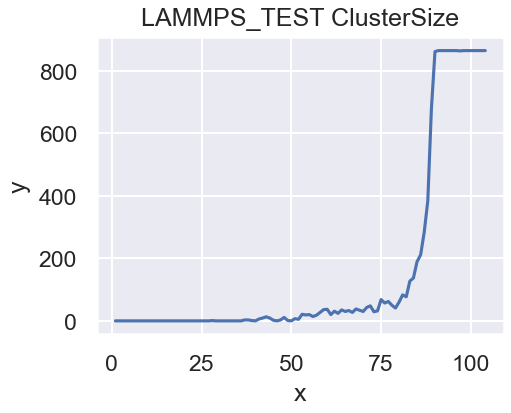

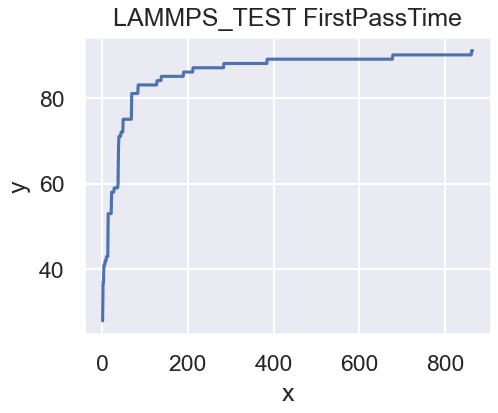

In [3]:
log('Start:Cluster',Printlog)
MD.turnoffall()
#MD.stepnumber=len(filesname[0])
#MD.onlyreturnsolidatomsnum=True
MD.clusteron=True
MD.firstpasson=True

#MD.stepnumber=1000
#MD.scale=1
if ToCalculate:
    MD.clusterneimethod='cutoff'
    MD.clustercutoff=0
    MD.clusterq6threshold=0.3
    MD.plotextraname='_'+str(MD.clusterneimethod)+'_'+str(MD.clustercutoff)+'_'+str(MD.clusterq6threshold)
    MDAnalysis.calculator(MD,filesname)
MD.MDplot()
log('Finish:Cluster',Printlog)


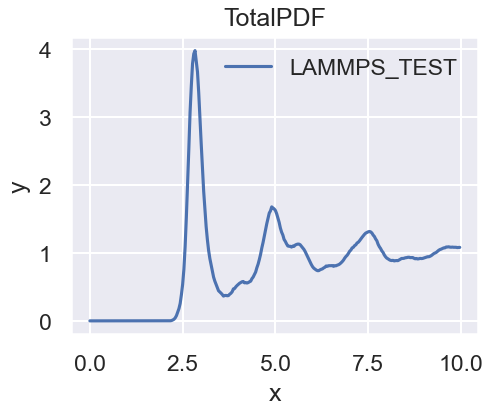

In [4]:
log('Start:PDF',Printlog)
MD.turnoffall()
MD.pdfon=True

MD.pdfBins=300
MD.pdfcut=10
MD.pdfthreadnum=1

#MD.stepnumber=1000
#MD.scale=1
if ToCalculate:
    MD.plotextraname=''
    MDAnalysis.calculator(MD,filesname)
MD.MDplot()
log('Finish:PDF',Printlog)


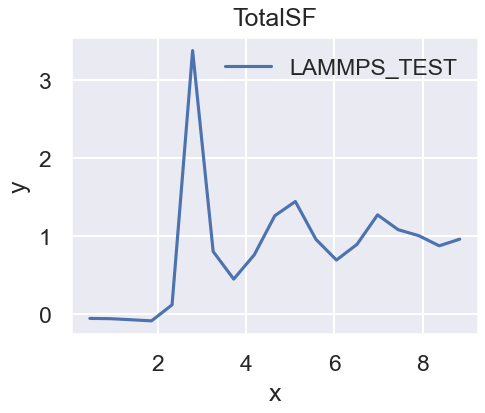

In [5]:
log('Start:SF',Printlog)
MD.turnoffall()
MD.sfon=True

MD.sfpdfBins=300
MD.sfpdfcut=13.5
MD.sfpdfthreadnum=20
MD.sfview_pointcut=20

#MD.stepnumber=1000
#MD.scale=1

if ToCalculate:
    MDAnalysis.calculator(MD,filesname)
MD.MDplot()
log('Finish:SF',Printlog)


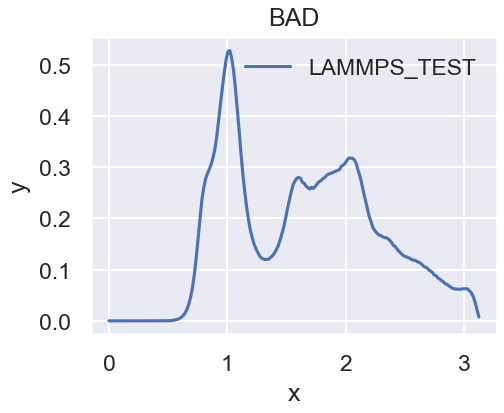

In [6]:
log('Start:BAD',Printlog)
MD.turnoffall()
MD.neighboron=True
MD.badon=True

MD.neighbormethod='voronoi'

MD.badBins=200

#MD.stepnumber=100
#MD.scale=10

if ToCalculate:
    MDAnalysis.calculator(MD,filesname)
MD.MDplot()
log('Finish:BAD',Printlog)



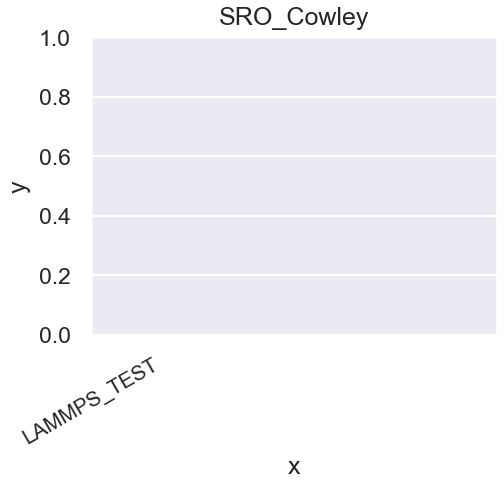

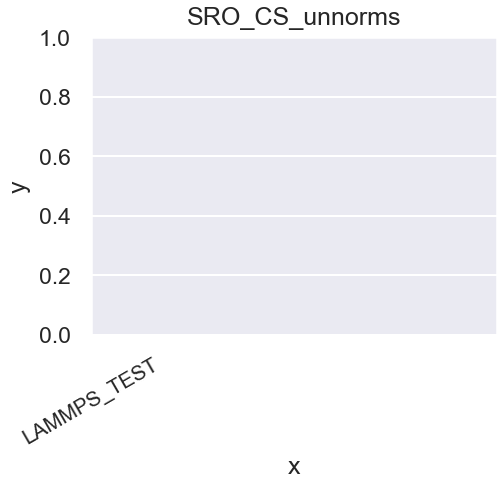

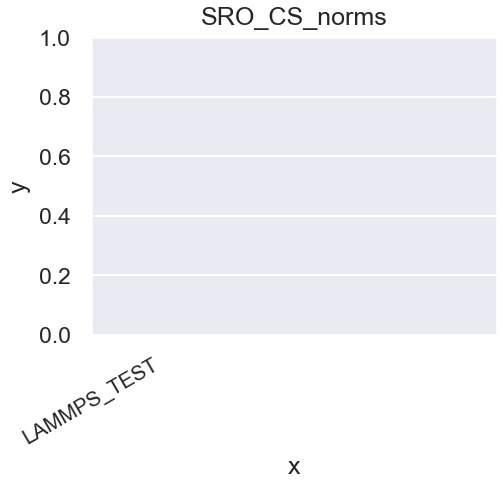

In [7]:
log('Start:SRO',Printlog)
MD.turnoffall()
MD.neighboron=True
MD.SROon=True

MD.neighbormethod='voronoi'

#MD.stepnumber=100
#MD.scale=10

if ToCalculate:
    MDAnalysis.calculator(MD,filesname)
MD.MDplot()
log('Finish:SRO',Printlog)

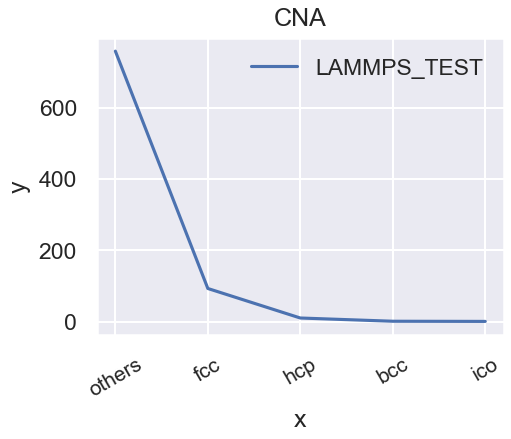

In [8]:
log('Start:CNA',Printlog)
MD.turnoffall()
MD.neighboron=True
MD.CNAon=True

MD.neighbormethod='voronoi'

#MD.stepnumber=100
#MD.scale=10

if ToCalculate:
    MDAnalysis.calculator(MD,filesname)
MD.MDplot()
log('Finish:CNA',Printlog)

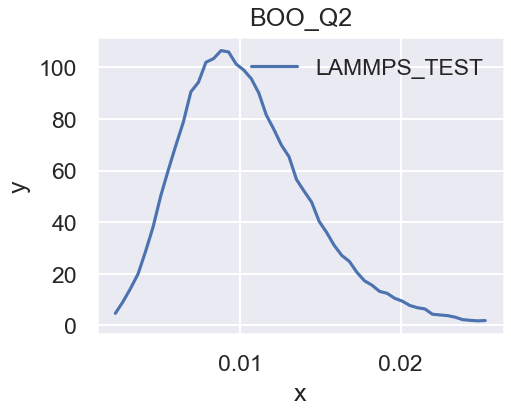

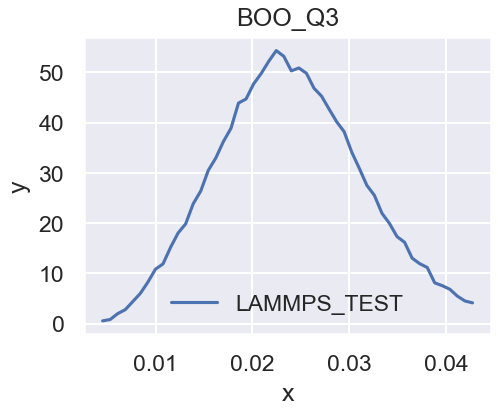

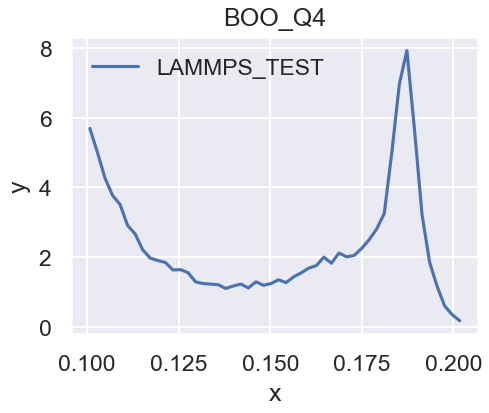

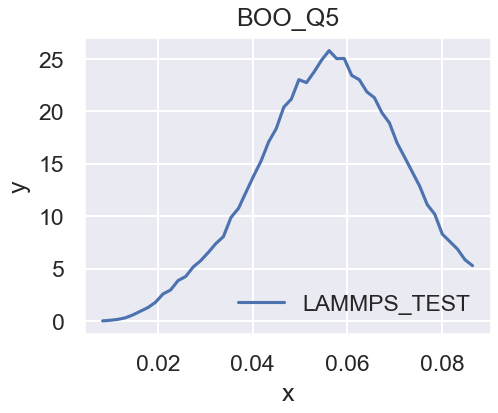

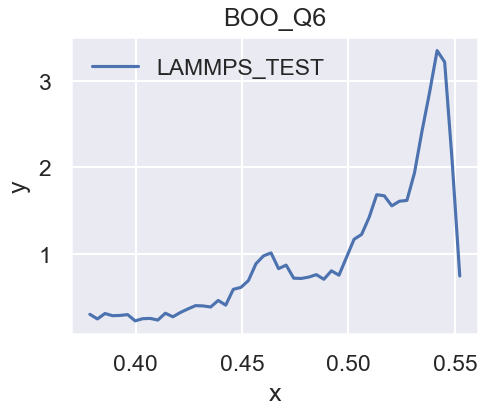

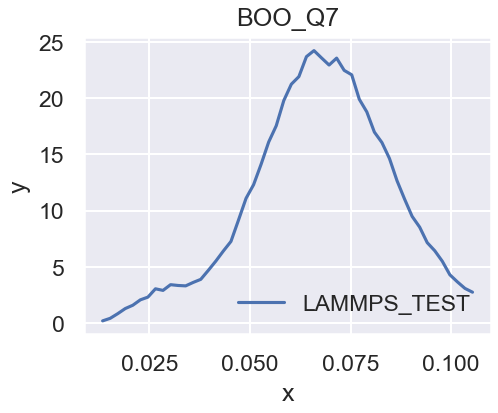

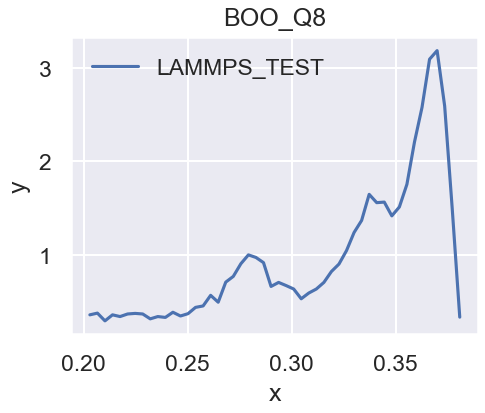

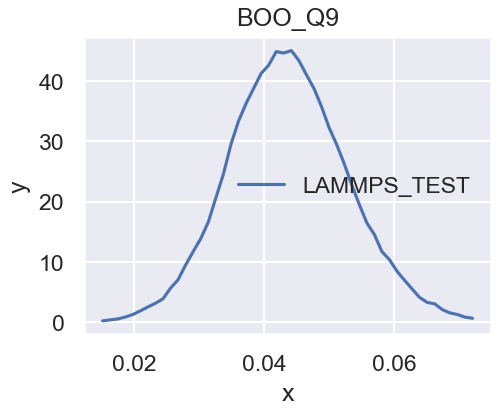

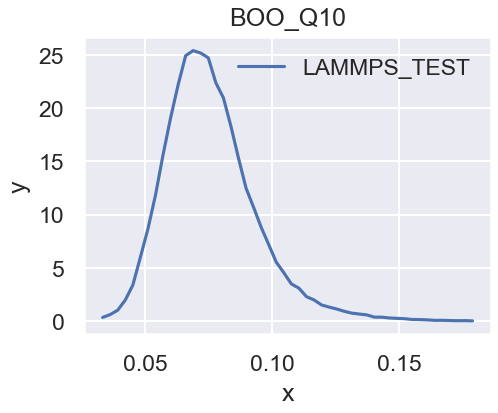

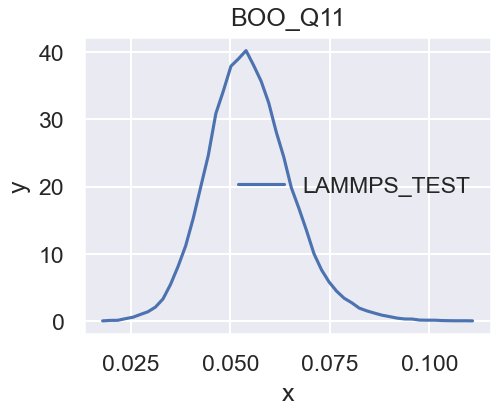

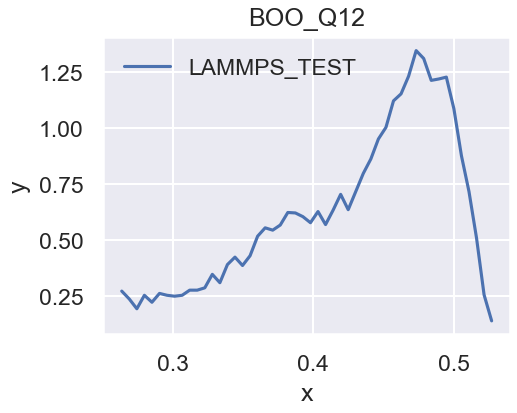

In [9]:
log('Start:BOO',Printlog)
MD.turnoffall()
MD.neighboron=True
MD.BOOon=True

MD.neighbormethod='voronoi'
MD.BOOBins=50
MD.BOOsname= range(2,13)

#MD.stepnumber=100
#MD.scale=10

if ToCalculate:
    MDAnalysis.calculator(MD,filesname)
MD.MDplot()
log('Finish:BOO',Printlog)

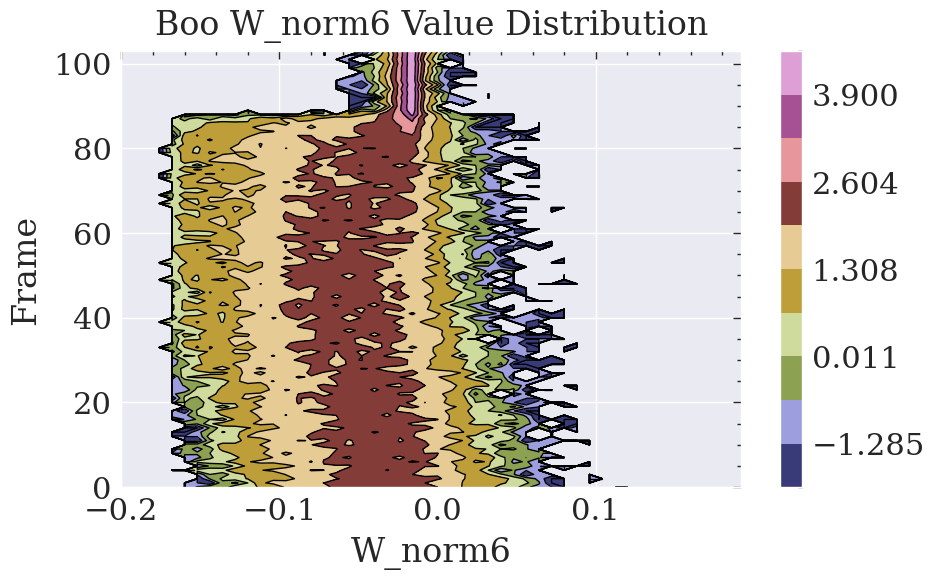

In [10]:
log('Start:W6normtimes',Printlog)
MD.turnoffall()
MD.neighboron=True
MD.BOOtimeson=True
MD.BOOtimes_Won=True
MD.BOOtimesMax=[0.2]
MD.BOOtimesMin=[-0.2]
MD.neighbormethod='cutoff-fit'
MD.BOOtimesBins=50
MD.BOOsname= [6]
MD.BOOtimesaverage=False
MD.plotextraname='fit'
MD.plotextraname=MD.plotextraname+'_AnaSpe'
#MD.stepnumber=100
#MD.scale=10

if ToCalculate:
    MDAnalysis.calculator(MD,filesname)
MD.MDplot()
log('Finish:W6normtimes',Printlog)



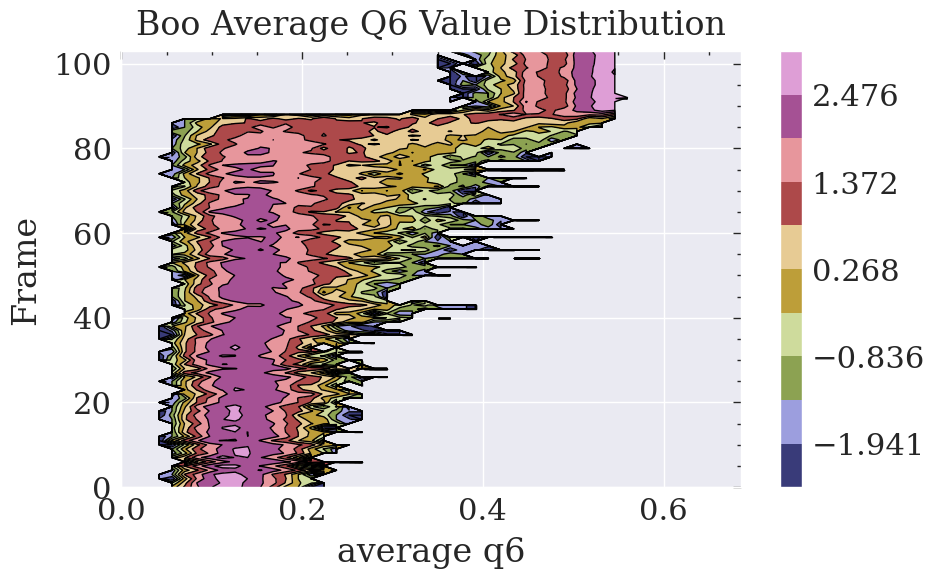

In [11]:
log('Start:aQ6times',Printlog)
MD.turnoffall()
MD.neighboron=True
MD.BOOtimeson=True
MD.BOOtimes_Won=False
MD.BOOtimesMax=[0.7]
MD.BOOtimesMin=[0]
MD.neighbormethod='cutoff-fit'
MD.BOOtimesBins=50
MD.BOOsname= [6]
MD.BOOtimesaverage=True
MD.plotextraname='fit'
MD.plotextraname=MD.plotextraname+'_AnaSpe'
#MD.stepnumber=100
#MD.scale=10

if ToCalculate:
    MDAnalysis.calculator(MD,filesname)
MD.MDplot()
log('Finish:aQ6times',Printlog)

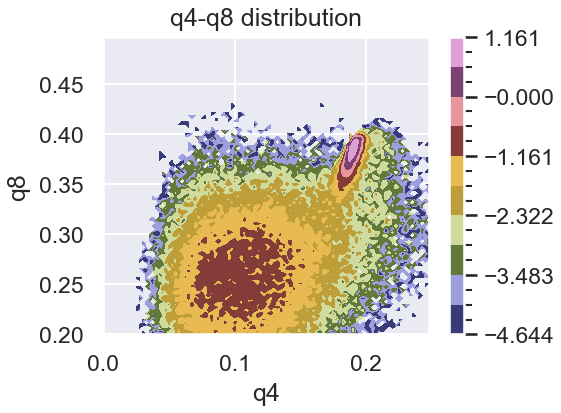

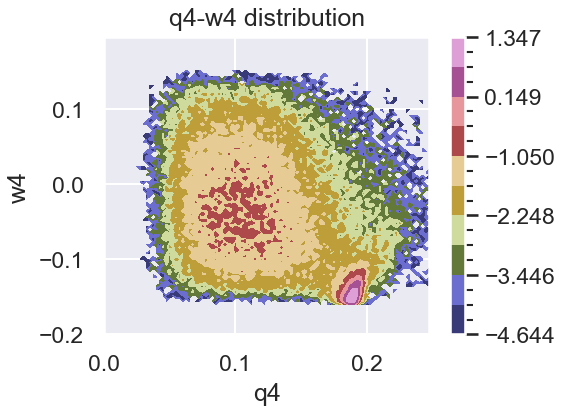

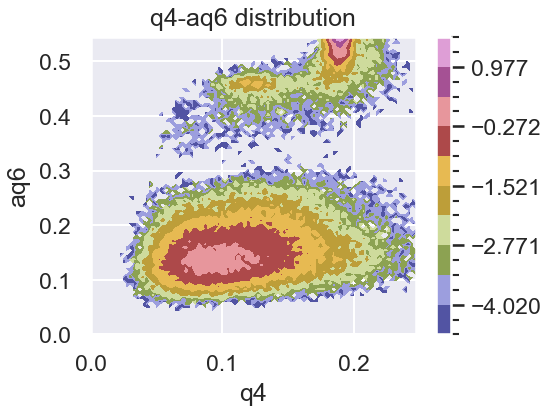

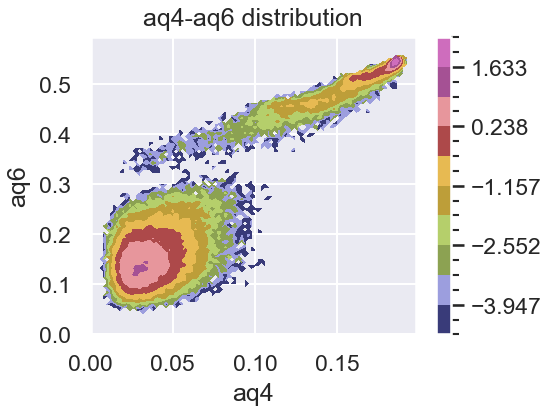

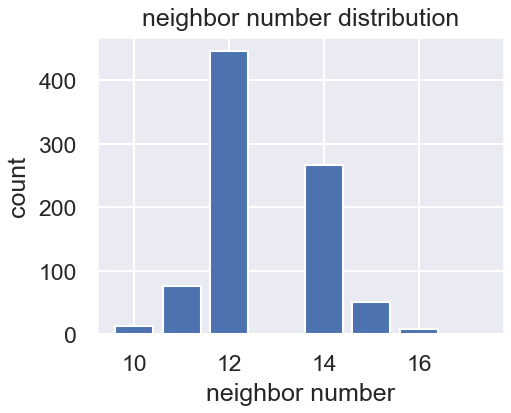

In [12]:
log('Start:Analyze2don',Printlog)
MD.turnoffall()
MD.neighboron=True
MD.neighbormethod='cutoff-fit'
MD.Analyze2don=True
MD.showmode='all'#precursor solid all
MD.precursoraq6cut=0.27
MD.plotextraname='_'+MD.showmode+'_'+str(JumpedNumber)+'_'+str(StepNumber)
if MD.showmode=='precursor':
    MD.plotextraname='_'+MD.showmode+str(MD.precursoraq6cut)+'_'+str(JumpedNumber)+'_'+str(StepNumber)
if ToCalculate:
    MDAnalysis.calculator(MD,filesname)
log('%-20s\t%10d'%('Solidnum:',MD.solidnum),Printlog)
log('%-20s\t%10d'%('Precursornum:',MD.precursornum),Printlog)
MD.MDplot()
log('Finish:Analyze2don',Printlog)

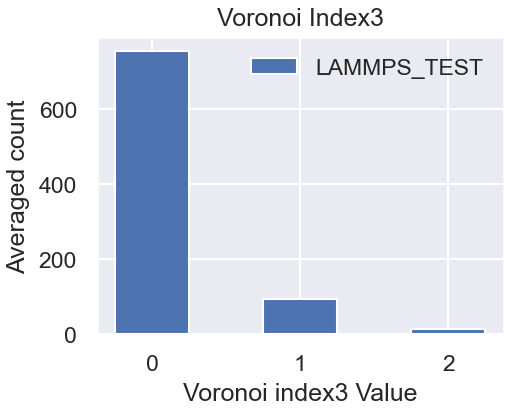

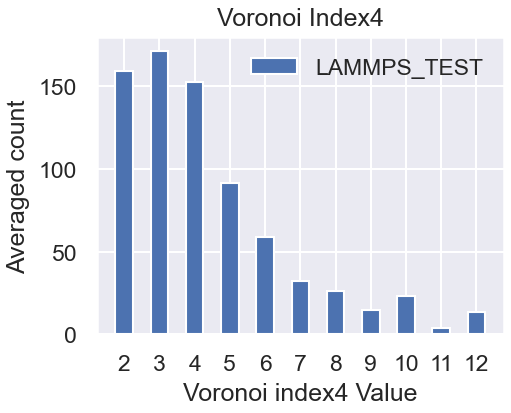

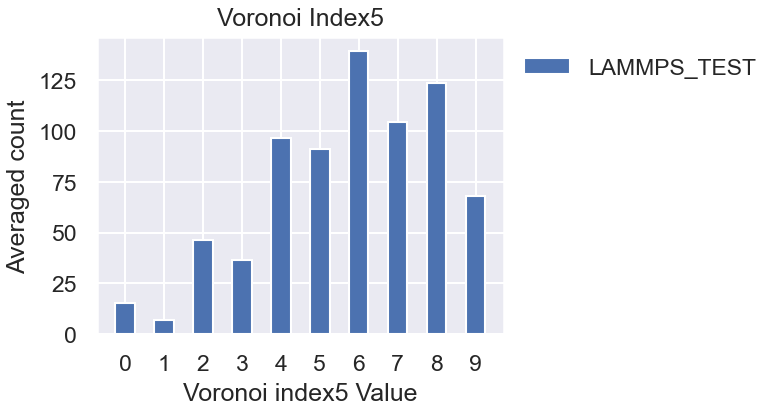

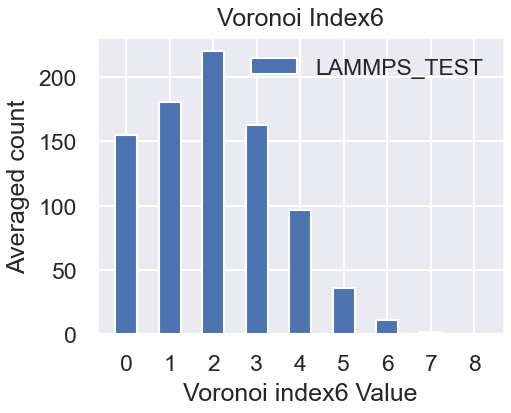

In [13]:
log('Start:VOIndex',Printlog)
MD.turnoffall()
MD.neighboron=True
MD.VIon=True
MD.neighbormethod='voronoi'

#MD.stepnumber=100
#MD.scale=10

if ToCalculate:
    MDAnalysis.calculator(MD,filesname)
MD.MDplot()
log('Finish:VOIndex',Printlog)


In [14]:
if SaveMD:
    f=open('AnaMDAnalysis',"wb")
    pickle.dump(MD,f)
    f.close()

